# Phân tích giá Macbook Pro 14" M1 Pro

In [59]:
import pandas as pd

df = pd.read_csv('macbook_pro_m1_pro_14.csv')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   49 non-null     object
 1   price                  49 non-null     int64 
 2   district               49 non-null     object
 3   date_crawl             49 non-null     object
 4   product_type           49 non-null     object
 5   time_since_date_crawl  49 non-null     object
 6   image_link             49 non-null     object
 7   product_link           49 non-null     object
 8   page                   49 non-null     int64 
 9   ram                    49 non-null     int64 
 10  rom                    49 non-null     int64 
dtypes: int64(4), object(7)
memory usage: 4.3+ KB


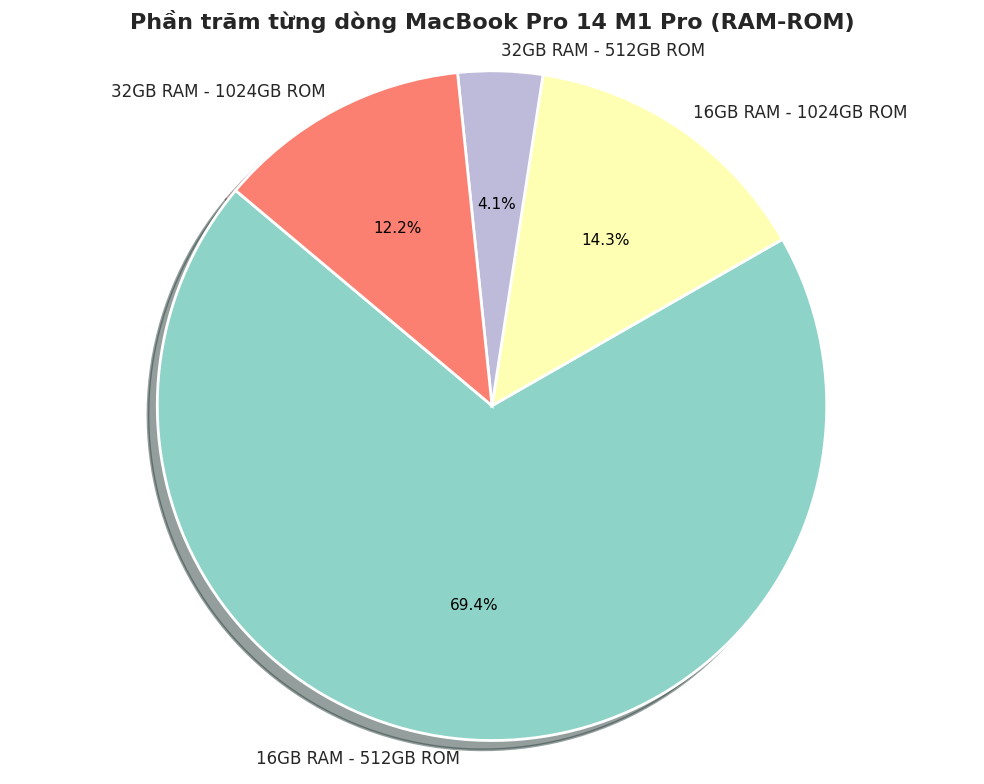

In [71]:
import matplotlib.pyplot as plt

# Đếm số lượng từng dòng máy (theo ram và rom)
counts = df.groupby(['ram', 'rom']).size().reset_index(name='count')

# Tạo nhãn hiển thị
counts['label'] = counts['ram'].astype(str) + 'GB RAM - ' + counts['rom'].astype(str) + 'GB ROM'

# Các màu sắc tươi sáng
colors = plt.cm.Set3(range(len(counts)))

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    counts['count'], 
    labels=counts['label'], 
    colors=colors,
    autopct='%1.1f%%', 
    startangle=140,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
    shadow=True,
    labeldistance=1.06 # 👈 Dịch nhãn ra xa hình tròn
)

# Tùy chỉnh chữ phần trăm
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)

# Tiêu đề
plt.title('Phần trăm từng dòng MacBook Pro 14 M1 Pro (RAM-ROM)', fontsize=16, fontweight='bold')

# Giãn phần trên cho tiêu đề
plt.subplots_adjust(top=0.85)

# Đảm bảo hình tròn đều và bố cục đẹp
plt.axis('equal')
plt.tight_layout()
plt.show()


Nói gì thì nói, bản base vẫn là bản được ưa chuộng nhất trong các dòng.

In [62]:
df['ram_rom'] = df['ram'].astype(str) + 'GB RAM - ' + df['rom'].astype(str) + 'GB ROM'


/tmp/ipykernel_8937/737430167.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ram_rom', y='price', data=df, palette=palette, linewidth=2.5)
/tmp/ipykernel_8937/737430167.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(x='ram_rom', y='price', data=df, palette=palette, linewidth=2.5)


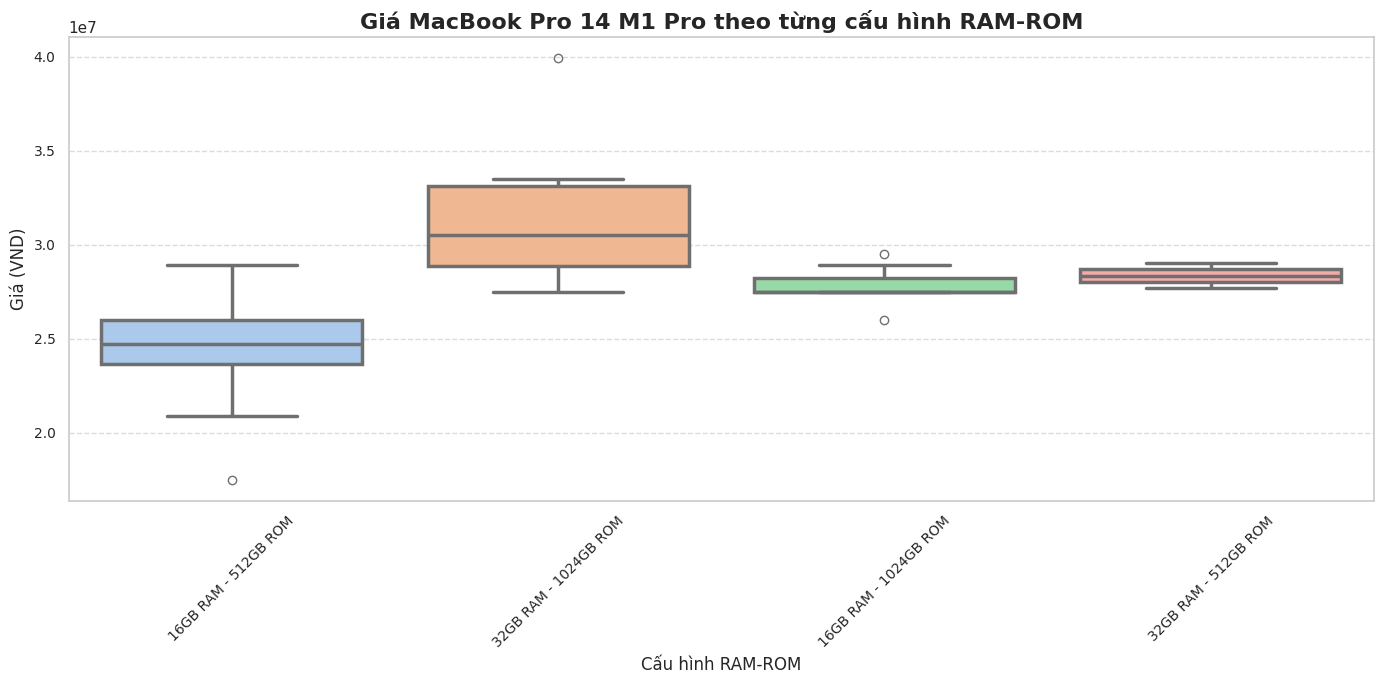

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style cho seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))
palette = sns.color_palette("pastel")  # Sử dụng bảng màu pastel
sns.boxplot(x='ram_rom', y='price', data=df, palette=palette, linewidth=2.5)

# Tùy chỉnh tiêu đề và nhãn
plt.title('Giá MacBook Pro 14 M1 Pro theo từng cấu hình RAM-ROM', fontsize=16, fontweight='bold')
plt.xlabel('Cấu hình RAM-ROM', fontsize=12)
plt.ylabel('Giá (VND)', fontsize=12)

# Xoay nhãn trục x và thêm lưới
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


# Kết luận

Rẻ nhất thì cứ mua bản base 16/512 nhé !

Riêng mình đánh giá phiên bản 32GB RAM - 512GB ROM đang có P/P tốt nhất. Vì bộ nhớ rom mình có thể sử dụng cloud hoặc box ssd để lưu trữ, còn ram thì không nâng cấp được rồi.
